In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [228]:
data_clean = pd.read_csv("../../CSV/SharkAttackCleaning.csv")

In [229]:
data_clean.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Activity', 'Fatal (Y/N)', 'Time',
       'Species'],
      dtype='object')

In [230]:
data_clean=data_clean.drop('Unnamed: 0', axis=1)

In [231]:
data_clean["Attack"]=int(1)

In [232]:
data_clean

,Year,Country,Activity,Fatal (Y/N),Time,Species,Attack
0,2018,AUSTRALIA,Surfing,N,Morning,Unknown,1
1,2018,AUSTRALIA,Surfing,N,Early Morning,Unknown,1
2,2018,AUSTRALIA,Surfing,N,Early Morning,Unknown,1
3,2018,AUSTRALIA,Surfing,N,Afternoon,White shark,1
4,2018,BAHAMAS,Surfing,N,Early Morning,Tiger shark,1
...,...,...,...,...,...,...,...
451,1965,AUSTRALIA,Surfing,N,Afternoon,Nurse shark,1
452,1963,AUSTRALIA,Surfing,N,Early Morning,Unknown,1
453,1962,AUSTRALIA,Surfing,N,Morning,whale shark,1
454,1960,AUSTRALIA,Surfing,N,Late Afternoon,White shark,1


# WORST COUNTRY AND TIME TO SURF IN HISTORY🏄‍♂️🏄‍♀️🦈

Text(0.5, 1.0, 'Top 10 worst countries and hours to surf')

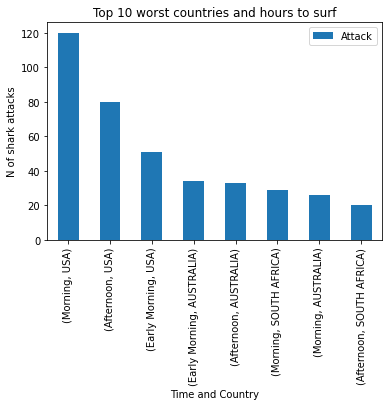

In [233]:
#Analizamos cuál ha sido el peor país y hora del día para hacer surf sumando todos los ataques registrados
data_clean.groupby(["Time","Country"]).agg({"Attack":"sum"}).sort_values(by="Attack",ascending=False,).head(8).plot.bar()
plt.xlabel("Time and Country")
plt.ylabel("N of shark attacks")
plt.title("Top 10 worst countries and hours to surf")

# MOST KILLER SHARK FOR SURFERS (LAST 20 YEARS) 🏄‍♂️🏄‍♀️🦈☠️

In [234]:
#Lo divido en períodos de 20 años
data_clean["20Years"] = pd.cut(data_clean.Year,
                                bins=[1959,1979,1999,2019], 
                                labels=range(1960,2020,20))

In [235]:
data_clean["20Years"].value_counts()  


2000    311
1980    115
1960     29
Name: 20Years, dtype: int64

Text(0.5, 1.0, 'Most killer shark of last 20 years')

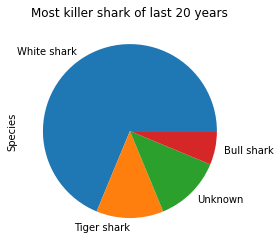

In [236]:
data_clean[(data_clean["20Years"] == 2000) & (data_clean["Fatal (Y/N)"]=="Y")].Species.value_counts().plot(kind="pie")
plt.title("Most killer shark of last 20 years")

# AVERAGE OF SURFERS FATAL ENDINGS BY SHARK  🦈☠️

In [237]:
#Genero una columna numérica en funcion de Fatal(Y/N)
data_clean["Fatal"]= data_clean["Fatal (Y/N)"].map({'Y': 1, 'N': 0}) 

In [238]:
data_clean.groupby(["Species"]).agg({"Attack":"sum","Fatal":"mean"}).sort_values(by="Fatal", ascending=False).head(5)

,Attack,Fatal
Species,,
White shark,132,0.136364
Bull shark,22,0.090909
Tiger shark,45,0.088889
Unknown,158,0.012658
Blacktip shark,17,0.000000


# WORST 10 YEARS FOR SURFING ATTENDING SHARK ATTACKS  🦈🏄‍♂️🏄‍♂️

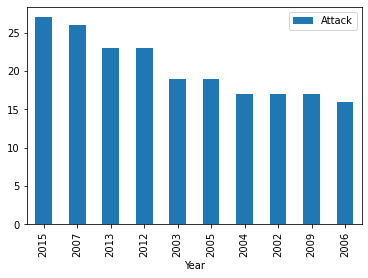

In [273]:
data_clean.groupby(["Year"]).agg({"Attack":"sum"}).sort_values(by="Attack",ascending=False).head(10).plot.bar()

# EVOLUTION OF LAST TEN YEARS

In [260]:
def fn(value):
    return "Dangerous" if value >= 15 else "Safe"

wy=data_clean.groupby(["Year"]).agg({"Attack":"sum"}).sort_values(by="Year",ascending=False).head(10)

In [261]:
wy["Warning"] = wy["Attack"].apply(fn)

In [262]:
wy

,Attack,Warning
Year,,
2018,8,Safe
2017,16,Dangerous
2016,9,Safe
2015,27,Dangerous
2014,15,Dangerous
2013,23,Dangerous
2012,23,Dangerous
2011,12,Safe
2010,11,Safe
